## HTML

### Weekly Sales Summary

Let's first take a close look on the trend of weekly sales during this two year period. The sales plot captures the sales trend ranges from Feb-2011 - Oct-2012. As we can see that the sales ranges approximate between 0 to 4 million. The sales trends for each store move flat over time except the two holiday seasons which start approximately from Nov 20 to Dec 31 for both years. As we all know, this period covers two big holidays which are Thanksgiving and Christmas retailers traditionally offers huge discount discount to customers. During these high selling period, the sales hike 1.5 - 2 times of the original sales.  So that we ought to pay more attention to the prediction for this holiday period.

## Reloading Dataset

In [1]:
import pandas as pd
import numpy as np

trainDf = pd.read_csv("./data/train.csv")
feaDf = pd.read_csv("./data/features.csv").drop(["IsHoliday"], axis=1)
storesDf = pd.read_csv("./data/stores.csv")


df1 = pd.merge(trainDf, feaDf, on = ["Store", "Date"])
#print(df1.shape)
train = pd.merge(df1, storesDf, on = "Store")
print("Dataset size:",train.shape)

#Rename column names
train.columns = ['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Store_Type', 'Size']

display(train.head(3))

Dataset size: (421570, 16)


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Store_Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


### Dropping Columns (MarkDown1, MarkDown2, MarkDown3, MarkDown4)

In [2]:
train.drop(columns=["MarkDown1","MarkDown2","MarkDown3","MarkDown4", "MarkDown5"], inplace = True)
display(train.head(5))

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Store_Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,211.096358,8.106,A,151315


## Data Analysis

In [3]:
import plotly.graph_objs as go
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.offline as offline

init_notebook_mode(connected=True)

In [ ]:
namesLst=list(map(str,train.Store.unique()))
dateLst = train.Date.unique()

aa=[]
salesLst=[]
timeLst=[]
storeSalesDict={}
for name in namesLst:
    print(name)
    storeSalesDict[int(name)]=[]
    for date in dateLst:
        aa=round(train.Weekly_Sales[train.Store == int(name)][train.Date == date].sum()/ 1000000,2)
        storeSalesDict[int(name)].append(aa)


In [5]:
traces=[]

for i, sales in storeSalesDict.items():
    #print(i, sales)
    traces.append(go.Scatter(
    x= pd.to_datetime(dateLst),
    y=sales,
    name="Store#"+str(i)
    ))


In [6]:
import numpy as np
aa= np.zeros((len(storeSalesDict),len(storeSalesDict)))
aa = [[str(aa[i][j]) for i in range(0,aa.shape[0])] for j in range(0,aa.shape[1])]
aa = [[False for i in range(0,len(aa))] for j in range(0,len(aa))]
for i in range(len(aa)):
    aa[i][i] = True

In [7]:
updatemenus = list([
    dict(type="buttons",
         active=-1,
         buttons=list([
            dict(label = 'Store 1',
                 method = 'update',
                 args = [{'visible': aa[0]},
                         {'title': 'Store 1 Sales'}])]))])

#[True, False, False, False,False, False, False]

In [8]:
layout = go.Layout(
    title = 'Weekly Sales (Figure 1)',
    #yaxis =dict(autorange=True, showgrid=True,zeroline=True, autotick=False),
    
    autosize=True,
    #width=700,
    #height=1000,
    yaxis =dict(title = "Weekly Sales (in Millions)", 
                exponentformat='e',
                showexponent='all',
                titlefont=dict(size=18),
                tick0=5,ticks="outside", 
                dtick=1, 
                tickwidth=2, 
                showgrid=True),
    xaxis = dict(title="Time Series (in Months)",
                 titlefont=dict(size=18),
                 exponentformat='e',
                 showexponent='all',
                 zeroline=True,  
                 showgrid=False,
                 rangeselector=dict(visible=True, 
                                    buttons=list([
                                        dict(count=1, 
                                             label="1m", 
                                             step="month", 
                                             stepmode ="backward"),
                                        dict(count=3, 
                                                 label="3m", 
                                                 step="month", 
                                                 stepmode ="backward"),
                                         dict(count=6, 
                                                 label="6m", 
                                                 step="month", 
                                                 stepmode ="backward"),
                                         dict(count=12, 
                                                 label="12m", 
                                                 step="month", 
                                                 stepmode ="backward"),
                                        dict(step ="all")])),
                 rangeslider = dict(visible=True)
                ),
    margin = dict(l=60,r=30, b=80, t=40),
    showlegend=False,
    updatemenus=updatemenus
)

In [9]:
fig = go.Figure(data=traces, layout=layout)
iplot(fig, show_link=True)

- Sales impact with holidays or without holidays
- Average Sales (working Days vs holidays)

- Hypotheses: features vs Weeky_Sales

Let's first take a close look on the trend of weekly sales during this two year period. The sales plot captures the sales trend ranges from Feb-2011 - Oct-2012. As we can see that the sales ranges approximate between 0 to 4 million. The sales trends for each store move flat over time except the two holiday seasons which start approximately from Nov 20 to Dec 31 for both years. As we all know, this period covers two big holidays which are Thanksgiving and Christmas retailers traditionally offers huge discount discount to customers. During these high selling period, the sales hike 1.5 - 2 times of the original sales.  So that we ought to pay more attention to the prediction for this holiday period.

### Weekly Sales in Store_Type

The figure 2 below shows the total sales generated by different store type (i.e. A, B, C). Obiviously, the sales in regular working holidays takes the major proportion of the sales in holidays because holidays like Christmas and Thanksgiving only takes small portion throughout the year. However, in figure 3,we could observe that the average weekly sales in holidays and working days are very close for Type A, B store. For type C store, the sales in working days is still 10x times more than the sales in holidays. Based on these findings, we could wonder what the Type C store actually sell because store sales generally go up during the holidays (but Sales of Type C stores go down). Also, we ought to observe this particular pattern would happen in the sales forecast onward.

In [10]:
trace1 = []

salesA = round(train.Weekly_Sales[train.Store_Type=="A"][train.IsHoliday==False].sum() / 1000000,2)
salesB = round(train.Weekly_Sales[train.Store_Type=="B"][train.IsHoliday==False].sum() / 1000000,2)
salesC = round(train.Weekly_Sales[train.Store_Type=="C"][train.IsHoliday==False].sum() / 1000000,2)

trace1 = go.Bar(
    x = sorted(list(set(train.Store_Type))),
    y = [salesA, salesB, salesC],
    name = "Working day"
)

salesA = round(train.Weekly_Sales[train.Store_Type=="A"][train.IsHoliday==True].sum() / 1000000,2)
salesB = round(train.Weekly_Sales[train.Store_Type=="B"][train.IsHoliday==True].sum() / 1000000,2)
salesC = round(train.Weekly_Sales[train.Store_Type=="C"][train.IsHoliday==True].sum() / 1000000,2)

trace2=[]
trace2 = go.Bar(
    x = sorted(list(set(train.Store_Type))),
    y = [salesA, salesB, salesC],
    name = "Holiday"
)

data = [trace1, trace2]
layout = go.Layout(
    title = "Store Type Sale - Total (Figure 2) ",
    barmode='group',
    showlegend=True,
    xaxis = dict(title = "Store Type"),
    yaxis = dict(title = " Sales (in Million)")
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=True)

In [11]:
salesA_len= len(list(train.Weekly_Sales[train.Store_Type=="A"][train.IsHoliday==False]))
salesA_tot = train.Weekly_Sales[train.Store_Type=="A"][train.IsHoliday==False].sum()
salesA_avg = salesA_tot/ salesA_len

salesB_len= len(list(train.Weekly_Sales[train.Store_Type=="B"][train.IsHoliday==False]))
salesB_tot = train.Weekly_Sales[train.Store_Type=="B"][train.IsHoliday==False].sum()
salesB_avg = salesB_tot/ salesB_len

salesC_len= len(list(train.Weekly_Sales[train.Store_Type=="C"][train.IsHoliday==False]))
salesC_tot = train.Weekly_Sales[train.Store_Type=="C"][train.IsHoliday==False].sum()
salesC_avg = salesC_tot/ salesC_len

trace1 = go.Bar(
    x = sorted(list(set(train.Store_Type))),
    y = [salesA_avg, salesB_avg, salesC_avg],
    name = "Working day"
)

salesA_len= len(list(train.Weekly_Sales[train.Store_Type=="A"][train.IsHoliday==True]))
salesA_tot = train.Weekly_Sales[train.Store_Type=="A"][train.IsHoliday==True].sum()
salesA_avg = salesA_tot/ salesA_len

salesB_len= len(list(train.Weekly_Sales[train.Store_Type=="B"][train.IsHoliday==True]))
salesB_tot = train.Weekly_Sales[train.Store_Type=="B"][train.IsHoliday==True].sum()
salesB_avg = salesB_tot/ salesB_len

salesC_len= len(list(train.Weekly_Sales[train.Store_Type=="C"][train.IsHoliday==False]))
salesC_tot = train.Weekly_Sales[train.Store_Type=="C"][train.IsHoliday==True].sum()
salesC_avg = salesC_tot/ salesC_len

trace2 = go.Bar(
    x = sorted(list(set(train.Store_Type))),
    y = [salesA_avg, salesB_avg, salesC_avg],
    name = "Holiday"
)

data = [trace1, trace2]
layout = go.Layout(
    title = "Store Type Sale - Weekly (Figure 3)",
    barmode='group',
    showlegend=True,
    xaxis = dict(title = "Store Type"),
    yaxis = dict(title = " Sales (in Million)")
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=True)

### BarPlot - Sales vs Department

The figure 4 below shows the ranking of Department in terms of Weekly Sales. The highest weekly sales which is about $75000 is generated by Dept 92; The lowest weekly which is -#7.68 is generated by store 47. This plot could demonstrate the sales deficiency between stores.

In [12]:
sales_dept = []
dept_lst=[]
lst=[]
for dept in list(set(train.Dept)):
    lst.append(tuple((dept,round(train.Weekly_Sales[train.Dept == dept].sum()/len(train.Weekly_Sales[train.Dept == dept]),2))))

df = pd.DataFrame(lst).sort_values(by=[1], ascending=True)
dept_lst = list(df.iloc[:,0])
sales_dept = list(df.iloc[:,1])
    
trace3 = []
trace3 = go.Bar(
    x = list(df.iloc[:,1]),
    y = list(map(str,list(df.iloc[:,0]))),
    orientation="h"
    #name = "Working day"
)

data = [trace3]
layout = go.Layout(
    #barmode='group',
    width=700,
    height=1200, 
    #showlegend=True
    title = 'Average Weekly Sales Ranking (Figure 4)',
    yaxis =dict(title = "Department Number", 
                #exponentformat='e',
                #showexponent='all',
                titlefont=dict(size=18),
                tick0=5,
                ticks="outside", 
                dtick=1, 
                tickwidth=2, 
                showgrid=False,
                type='category'),
    xaxis = dict(title="Weekly Sales($)",
                 titlefont=dict(size=18),
                 zeroline=True, 
                 #range=[2,5], 
                 showgrid=True)
)

annotations=[]
for i in range(len(dept_lst)):
    annotations.append(dict(x=sales_dept[i], 
                            y=dept_lst[i],
                            text="%0.2f"%(sales_dept[i]),
                            font=dict(family='Arial', 
                                      size=12,
                                      color='red'),
                            showarrow=True,
                            align = "center",
                            ax=40,
                            ay=0,
                            arrowhead=0))
    layout['annotations'] = annotations


fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=True)

## Correlation 

Now, we are going to check whether the Store Weekly Sales is correlated with the following features.

- Weekly_Sales vs Temperature
- Weekly_Sales vs Fuel_Price
- Weekly_Sales vs CPI
- Weekly_Sales vs Size

Based on the following plots, it is difficult to determine the intensity of correlation between those features against Weekly Sales except the Store Size (i.e. Seems the higher the Store Size leads to higher Store Weekly Sales). To further verify, hypotheses tests will be performed as following. 

In [ ]:
'''*************************No need to Run*****************'''
ws=[]
temp=[]
fp=[]
cpi=[]
size=[]
for date in list(set(train.Date)):
    print(date)
    for store in list(set(train.Store)):
        ws.append((train.Weekly_Sales[train.Store == store][train.Date == date]).sum())
        temp.append(list(set(train.Temperature[train.Store == store][train.Date == date]))[0])
        fp.append(list(set(train.Fuel_Price[train.Store == store][train.Date == date]))[0])
        cpi.append(list(set(train.CPI[train.Store == store][train.Date == date]))[0])
        size.append(list(set(train.Size[train.Store == store][train.Date == date]))[0])
        
pd.DataFrame(list(zip(ws, temp, fp, cpi, size)), 
             columns= ["Weekly_Sales", "Temperture", "Fuel_Price", "CPI", "Size"]).to_csv("Weekly_Sales_Corr.csv")        

In [66]:
'''****************Read the Weekly Sales Correlated Feature Table************'''
df = pd.read_csv("Weekly_Sales_Corr.csv", )
ws=list(df.Weekly_Sales)
temp=list(df.Temperture)
fp=list(df.Fuel_Price)
cpi=list(df.CPI)
size=list(df.Size)

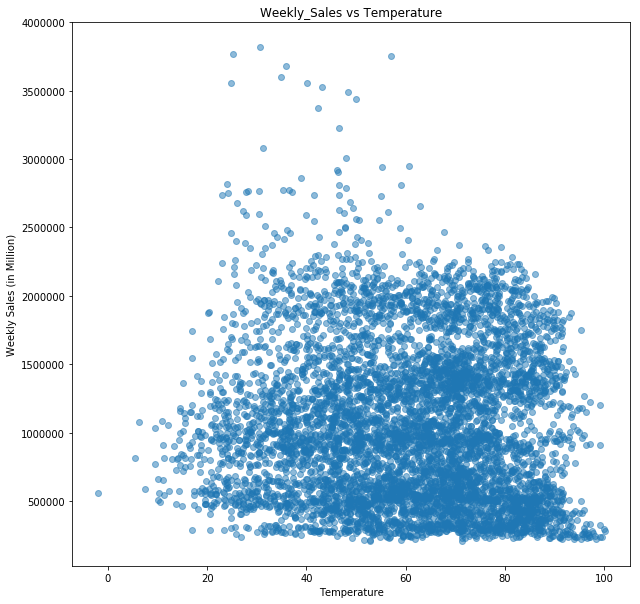

In [56]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,10))

x = temp#list(train.Temperature)
y = ws#list(np.array(list(train.Weekly_Sales)) / 1000000)

plt.scatter(x=x, y=y, alpha=0.5)
plt.xlabel("Temperature")
plt.ylabel("Weekly Sales (in Million)")
plt.title("Weekly_Sales vs Temperature")
plt.show()

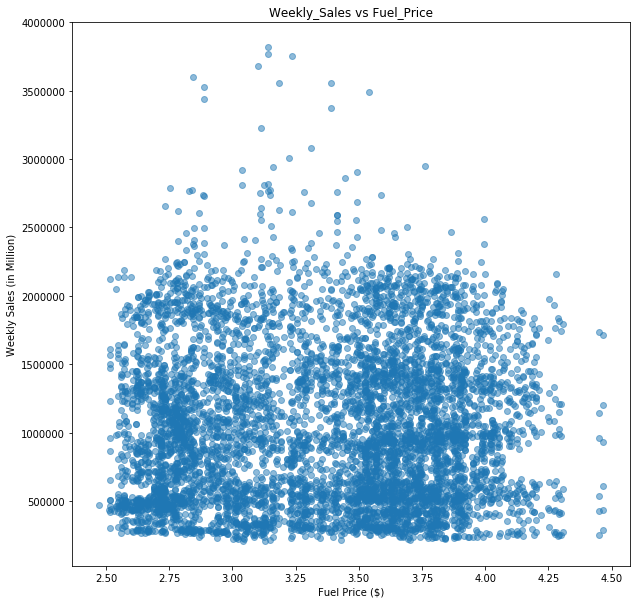

In [57]:
plt.figure(figsize=(10,10))

x = fp
y = ws

plt.scatter(x=x, y=y, alpha=0.5)
plt.xlabel("Fuel Price ($)")
plt.ylabel("Weekly Sales (in Million)")
plt.title("Weekly_Sales vs Fuel_Price")
plt.show()

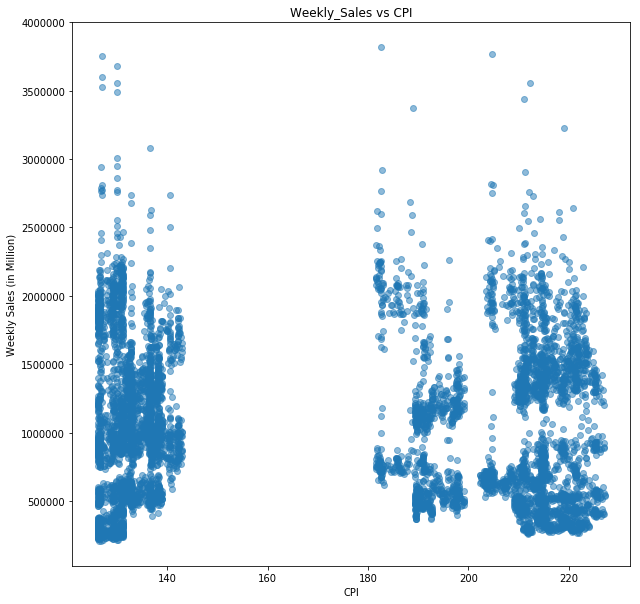

In [67]:
plt.figure(figsize=(10,10))

x = cpi
y = ws

plt.scatter(x=x, y=y, alpha=0.5)
plt.xlabel("CPI")
plt.ylabel("Weekly Sales (in Million)")
plt.title("Weekly_Sales vs CPI")
plt.show()

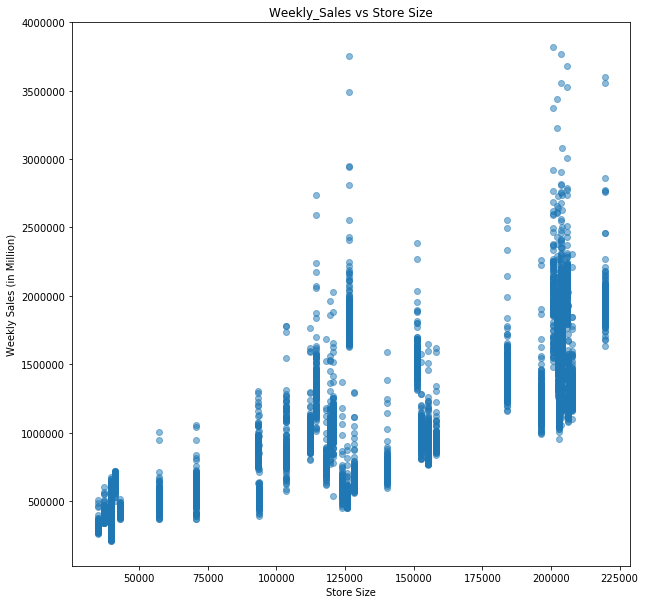

In [68]:
plt.figure(figsize=(10,10))

x = size
y = ws

plt.scatter(x=x, y=y, alpha=0.5)
plt.xlabel("Store Size")
plt.ylabel("Weekly Sales (in Million)")
plt.title("Weekly_Sales vs Store Size")
plt.show()

## Hypotheses Test:

- Null Hypothesis H0: features (i.e. Temperature, Fuel_Price, CPI, Store Size) NOT correlates with the  Store Weekly Sales.
- Alt. Hypothesis Ha: Features correlates with the Store Weekly Sales.
**Hypotheses Test

Acccording to the following Hypotheses Test for the features Temperature, CPI and Store Size with either (Z = -5) < -3 or (Z = 65) > 3  which means the p-value is more than 3 standard deviation below the mean. In other words, it shows more than 99.7% of chance the correlation of samples are not the same as the population mean. So that we have strong evidence to **reject the Null Hypotheses and proves that the features except Fuel_Price correlates with Store Weekly Sales.** Based on this result, we should pay more attention on those features during Machine Learning process.

In [69]:
#Calculate pearson correlation function
def pearson_r(x,y):
    corr_mat = np.corrcoef(x,y)
    return corr_mat[0,1]

#Calculate P-value function
def p_value(array, value):
    return (value - np.mean(array))/np.std(array)

In [81]:
xi = temp
yi = ws

No_bootstrap_trial = len(ws)
coef_lst=[]
for i in range(No_bootstrap_trial):
    x  = np.random.permutation(xi)
    y  = np.random.permutation(yi)
    coef_lst.append(np.corrcoef(x,y)[0,1])

org_coef = np.corrcoef(xi,yi)
p_val = p_value(coef_lst, org_coef)
print("The Z value for Temperature vs Weekly Sales is", p_val[0,1])

The Z value for Temperature vs Weekly Sales is -4.986916653505684


In [82]:
xi = fp
yi = ws

No_bootstrap_trial = len(ws)
coef_lst=[]
for i in range(No_bootstrap_trial):
    x  = np.random.permutation(xi)
    y  = np.random.permutation(yi)
    coef_lst.append(np.corrcoef(x,y)[0,1])

org_coef = np.corrcoef(xi,yi)
p_val = p_value(coef_lst, org_coef)
print("The Z value for Fuel_Price vs Weekly Sales is", p_val[0,1])

The Z value for Fuel_Price vs Weekly Sales is 0.7735865100116776


In [83]:
xi = cpi
yi = ws

No_bootstrap_trial = len(ws)
coef_lst=[]
for i in range(No_bootstrap_trial):
    x  = np.random.permutation(xi)
    y  = np.random.permutation(yi)
    coef_lst.append(np.corrcoef(x,y)[0,1])

org_coef = np.corrcoef(xi,yi)
p_val = p_value(coef_lst, org_coef)
print("The Z value for CPI vs Weekly Sales is", p_val[0,1])

The Z value for CPI vs Weekly Sales is -5.780444917793225


In [84]:
xi = size
yi = ws

No_bootstrap_trial = len(ws)
coef_lst=[]
for i in range(No_bootstrap_trial):
    x  = np.random.permutation(xi)
    y  = np.random.permutation(yi)
    coef_lst.append(np.corrcoef(x,y)[0,1])

org_coef = np.corrcoef(xi,yi)
p_val = p_value(coef_lst, org_coef)
print("The Z value for Store Size vs Weekly Sales is", p_val[0,1])

The Z value for Store Size vs Weekly Sales is 64.91676932437296
